In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv(r"C:\Users\ashat\Downloads\TATAMOTORS.NS.csv")

In [32]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-09,256.649994,260.399994,255.500000,257.850006,257.048859,7777719
1,2018-08-10,257.250000,258.649994,249.550003,250.100006,249.322937,14606037
2,2018-08-13,249.250000,249.699997,243.100006,248.699997,247.927277,13877900
3,2018-08-14,248.600006,249.850006,247.199997,248.800003,248.026978,9171033
4,2018-08-16,245.800003,252.800003,245.250000,251.300003,250.519211,14148347
...,...,...,...,...,...,...,...
1228,2023-08-02,644.000000,644.299988,616.450012,622.650024,622.650024,15762687
1229,2023-08-03,623.000000,626.450012,614.150024,618.950012,618.950012,11458920
1230,2023-08-04,624.849976,625.000000,613.299988,615.000000,615.000000,11806739
1231,2023-08-07,619.000000,619.000000,608.500000,609.500000,609.500000,9893466


In [33]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

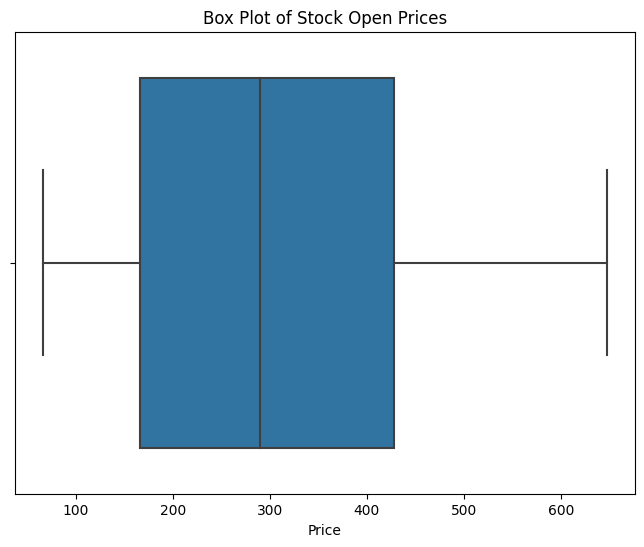

In [36]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Open'])
plt.title('Box Plot of Stock Open Prices')
plt.xlabel('Price')
plt.show()

In [49]:
Q1 = df['Open'].quantile(0.25)
print(Q1)
Q3 = df['Open'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
# Identify potential outliers
outliers = df[(df['Open'] < lower_bound) | (df['Open'] > upper_bound)]

#print("Potential Outliers:")
print(outliers)

166.850006
428.450012
261.600006
-225.550003
820.850021
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


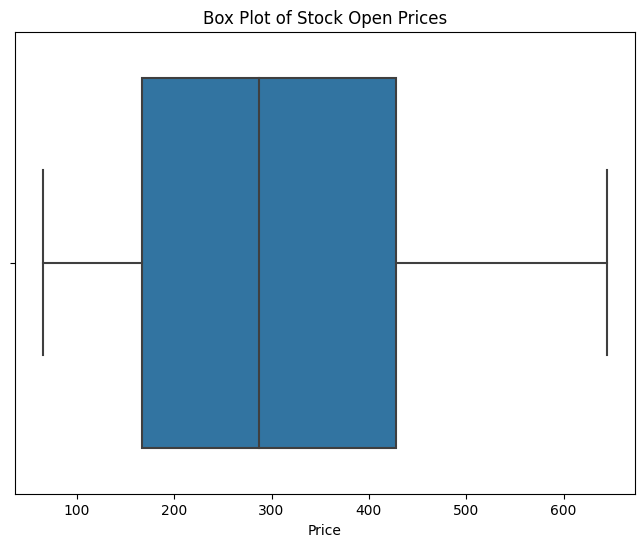

In [50]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title('Box Plot of Stock Open Prices')
plt.xlabel('Price')
plt.show()

In [51]:
Q1 = df['Close'].quantile(0.25)
print(Q1)
Q3 = df['Close'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
# Identify potential outliers
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

#print("Potential Outliers:")
print(outliers)

166.850006
427.75
260.899994
-224.49998499999998
819.099991
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [4]:
df=df[['Date','Close']]

In [5]:
df

,Date,Close
0,2018-08-09,257.850006
1,2018-08-10,250.100006
2,2018-08-13,248.699997
3,2018-08-14,248.800003
4,2018-08-16,251.300003
...,...,...
1228,2023-08-02,622.650024
1229,2023-08-03,618.950012
1230,2023-08-04,615.000000
1231,2023-08-07,609.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1233 non-null   object 
 1   Close   1233 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.4+ KB


In [7]:
import datetime

In [8]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\ashat\AppData\Local\Temp\ipykernel_11312\3023999556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


In [9]:
df.index=df.pop('Date')

In [10]:
df

,Close
Date,
2018-08-09,257.850006
2018-08-10,250.100006
2018-08-13,248.699997
2018-08-14,248.800003
2018-08-16,251.300003
...,...
2023-08-02,622.650024
2023-08-03,618.950012
2023-08-04,615.000000


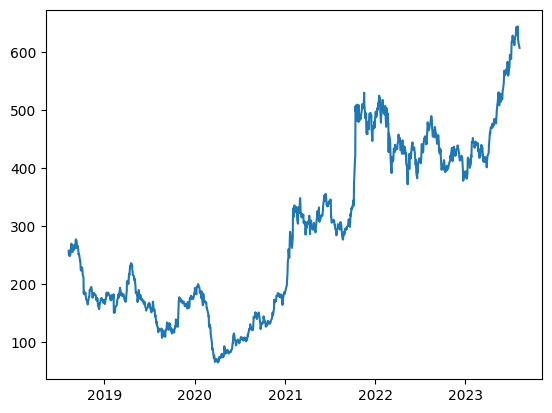

In [11]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [12]:

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = pd.to_datetime(first_date_str)
  last_date  = pd.to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,303.049988,307.399994,294.450012,285.549988
1,2021-03-26,307.399994,294.450012,285.549988,296.399994
2,2021-03-30,294.450012,285.549988,296.399994,297.049988
3,2021-03-31,285.549988,296.399994,297.049988,301.799988
4,2021-04-01,296.399994,297.049988,301.799988,307.750000
...,...,...,...,...,...
241,2022-03-16,418.149994,411.700012,413.649994,424.899994
242,2022-03-17,411.700012,413.649994,424.899994,433.799988
243,2022-03-21,413.649994,424.899994,433.799988,427.950012
244,2022-03-22,424.899994,433.799988,427.950012,440.350006


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((246,), (246, 3, 1), (246,))

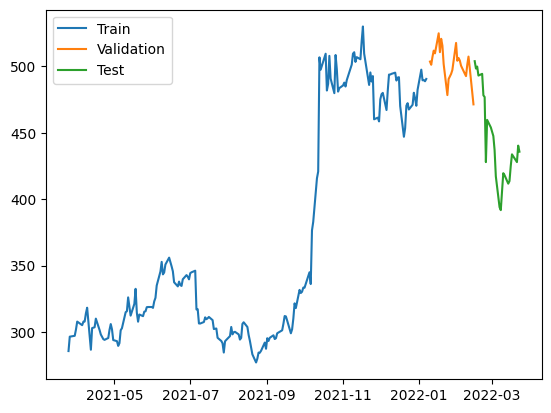

In [14]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 8s 252ms/step - loss: 142392.2656 - mean_absolute_error: 368.1180 - val_loss: 252948.7344 - val_mean_absolute_error: 502.8014
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 141820.6250 - mean_absolute_error: 367.3425 - val_loss: 252537.4062 - val_mean_absolute_error: 502.3922
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 141533.4688 - mean_absolute_error: 366.9539 - val_loss: 252140.5000 - val_mean_absolute_error: 501.9970
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 141252.2500 - mean_absolute_error: 366.5726 - val_loss: 251731.6562 - val_mean_absolute_error: 501.5896
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 140906.6250 - mean_absolute_error: 366.0992 - val_loss: 251138.5781 - val_mean_absolute_error: 500.9981
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 140455.4844 - mean_absolute_error: 365.4812 - v

7/7 [==============================] - 1s 4ms/step


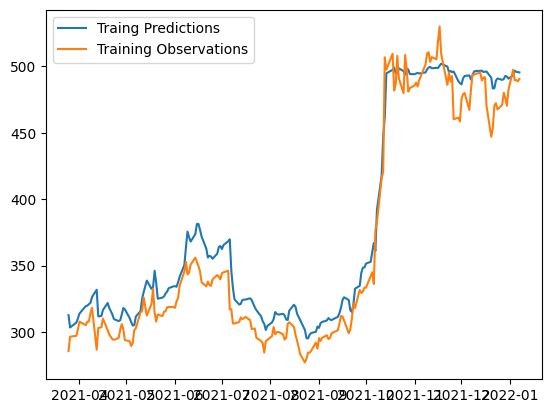

In [16]:
train_predictions=model.predict(X_train).flatten()
plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.legend(['Traing Predictions','Training Observations'])

1/1 [==============================] - 0s 48ms/step


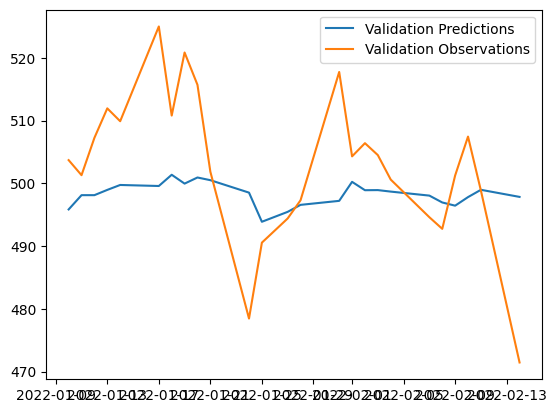

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 47ms/step


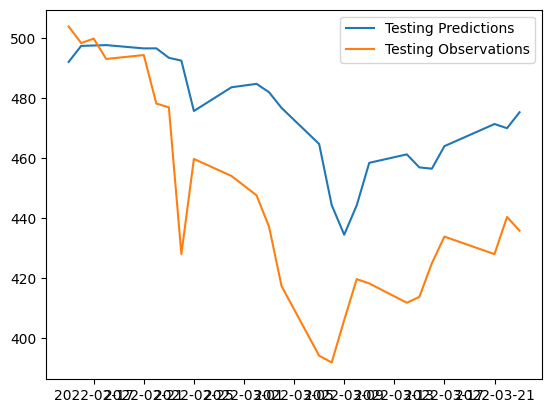

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

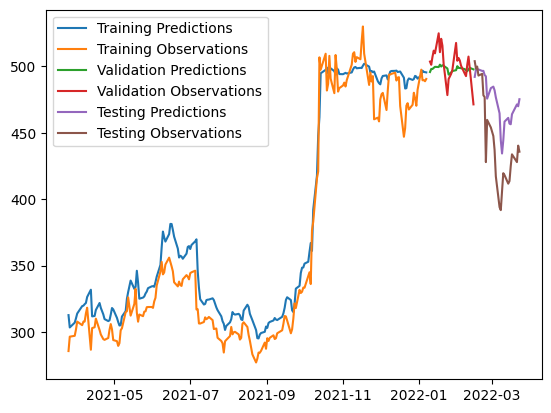

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [20]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 63ms/step


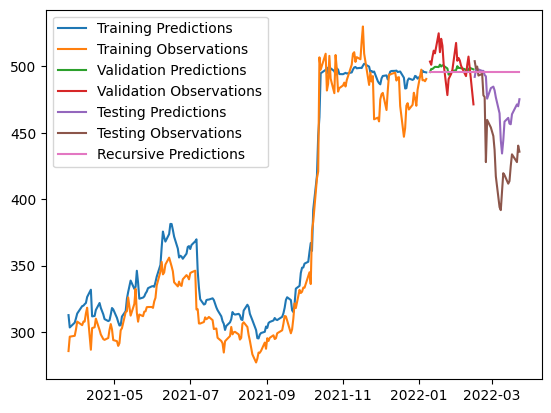

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])